<a href="https://colab.research.google.com/github/Raju7845/SPAM-EMAIL-CLASSIFICATION-USING-NAIVE-BAYES-ALGORITHM/blob/main/IPL_score_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

In [10]:
# Loading the dataset
df = pd.read_csv('/content/ipl_data (1).csv')
df.shape


(42771, 15)

In [11]:
# Data Cleaning: Converting date to datetime and checking for missing values
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)

In [12]:
# Feature Engineering: Extracting date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [13]:
# Rolling Statistics: Calculating rolling averages (example for runs and wickets)
df['rolling_avg_runs'] = df.groupby('batsman')['runs'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['rolling_avg_wickets'] = df.groupby('bowler')['wickets'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Interaction Features: Example between batting and bowling teams
df['bat_bowl_interaction'] = df['bat_team'] + '_vs_' + df['bowl_team']

# Cumulative Stats: Example cumulative runs and wickets
df['cumulative_runs'] = df.groupby('batsman')['runs'].cumsum()
df['cumulative_wickets'] = df.groupby('bowler')['wickets'].cumsum()

In [14]:
# Player and Venue Stats: Example historical performance
player_venue_stats = df.groupby(['batsman', 'venue'])['runs'].mean().reset_index()
player_venue_stats.columns = ['batsman', 'venue', 'avg_runs_venue']
df = pd.merge(df, player_venue_stats, on=['batsman', 'venue'], how='left')

In [15]:
# Encoding Categorical Variables: OneHotEncoding
categorical_features = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'bat_bowl_interaction']
numeric_features = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'year', 'month', 'day', 'day_of_week', 'rolling_avg_runs', 'rolling_avg_wickets', 'cumulative_runs', 'cumulative_wickets', 'avg_runs_venue']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [16]:
# Fit and transform the data
X = df.drop(['total', 'date','month','day','day_of_week','bat_bowl_interaction'], axis=1)  # Drop target and date columns
y = df['total']  # Target variable
print(X)

       mid                  venue               bat_team  \
0        1  M Chinnaswamy Stadium  Kolkata Knight Riders   
1        1  M Chinnaswamy Stadium  Kolkata Knight Riders   
2        1  M Chinnaswamy Stadium  Kolkata Knight Riders   
3        1  M Chinnaswamy Stadium  Kolkata Knight Riders   
4        1  M Chinnaswamy Stadium  Kolkata Knight Riders   
...    ...                    ...                    ...   
42765  347           Eden Gardens        Kings XI Punjab   
42766  347           Eden Gardens        Kings XI Punjab   
42767  347           Eden Gardens        Kings XI Punjab   
42768  347           Eden Gardens        Kings XI Punjab   
42769  347           Eden Gardens        Kings XI Punjab   

                         bowl_team       batsman     bowler  runs  wickets  \
0      Royal Challengers Bangalore    SC Ganguly    P Kumar   1.0      0.0   
1      Royal Challengers Bangalore   BB McCullum    P Kumar   1.0      0.0   
2      Royal Challengers Bangalore   BB McCul

In [17]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,year,month,day,day_of_week,rolling_avg_runs,rolling_avg_wickets,bat_bowl_interaction,cumulative_runs,cumulative_wickets,avg_runs_venue
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,...,2008,4,18,4,1.000000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,1.0,0.0,50.403846
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,...,2008,4,18,4,1.000000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,1.0,0.0,89.030303
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,...,2008,4,18,4,1.500000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,3.0,0.0,89.030303
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,...,2008,4,18,4,1.666667,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,5.0,0.0,89.030303
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,...,2008,4,18,4,1.750000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,7.0,0.0,89.030303


In [18]:
# Creating the preprocessing and model pipeline (Example using Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [19]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Defining categorical and numerical features
categorical_features = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
numeric_features = ['mid','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker','year','rolling_avg_runs','rolling_avg_wickets','cumulative_runs','cumulative_wickets','avg_runs_venue']

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Applying the transformations to the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [21]:
# Creating the neural network model
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_transformed.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compiling the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [22]:
# Training the model
model.fit(X_train_transformed, y_train, epochs=50, batch_size=64, validation_data=(X_test_transformed, y_test))

Epoch 1/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 51.1347 - val_loss: 12.1695
Epoch 2/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 11.6092 - val_loss: 11.1950
Epoch 3/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 10.0305 - val_loss: 9.2733
Epoch 4/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 8.3127 - val_loss: 7.7226
Epoch 5/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 6.8734 - val_loss: 6.5216
Epoch 6/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6.0280 - val_loss: 5.8262
Epoch 7/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 5.2337 - val_loss: 5.5240
Epoch 8/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 4.6242 - val_loss: 4.9125
Epoch 9/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 4.2995 - val_loss: 4.5463
Epoch 10/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.9333 - val_loss: 4.4900
Epoch 11/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.5621 - val_loss: 4.0295
Epoch 12/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

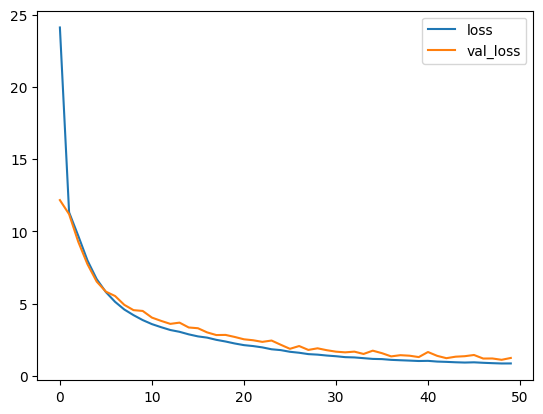

In [23]:
#storing the training and validation loss values to the neural network during the training process
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


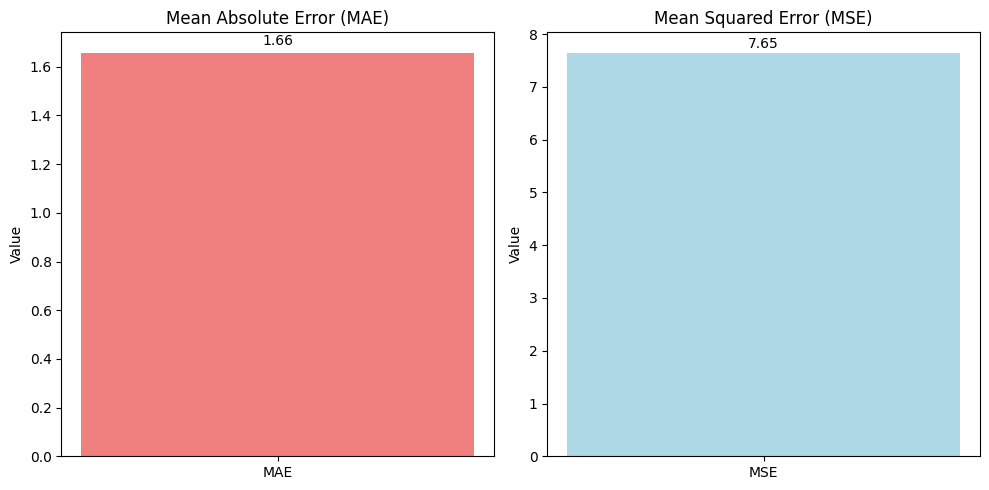

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions and evaluating the model
predictions = model.predict(X_test_transformed)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Plotting MAE and MSE with values on top
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjusted for two plots

# MAE Bar Plot
axes[0].bar(['MAE'], [mae], color='lightcoral')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('Value')
# Adding value on top of MAE bar (with an adjusted offset to keep it inside the bar)
axes[0].text(0, mae + 0.02, f'{mae:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# MSE Bar Plot
axes[1].bar(['MSE'], [mse], color='lightblue')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('Value')
# Adding value on top of MSE bar (with an adjusted offset to keep it inside the bar)
axes[1].text(0, mse + 0.02, f'{mse:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


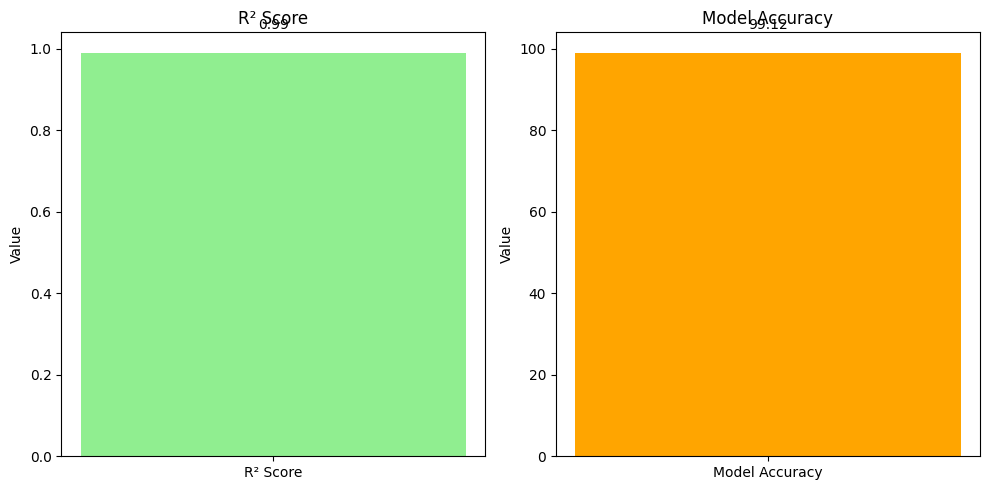

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Making predictions and evaluating the model
predictions = model.predict(X_test_transformed)

r2 = r2_score(y_test, predictions)
accuracy = r2 * 100  # Assuming accuracy is derived from R²

# Plotting R² and Model Accuracy with values on top
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjusted for two plots

# R² Bar Plot
r2_bar = axes[0].bar(['R² Score'], [r2], color='lightgreen')
axes[0].set_title('R² Score')
axes[0].set_ylabel('Value')

# Adding value on top of R² bar, ensuring it does not go out of bounds
axes[0].text(0, r2 + (r2 * 0.05), f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Model Accuracy Bar Plot
accuracy_bar = axes[1].bar(['Model Accuracy'], [accuracy], color='orange')
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Value')

# Adding value on top of Model Accuracy bar, ensuring it does not go out of bounds
axes[1].text(0, accuracy + (accuracy * 0.05), f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


NameError: name 'X_train_transformed' is not defined

NameError: name 'X_train' is not defined

In [35]:
predictions = model.predict(X_test_transformed)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)



268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


1.6585501572058416

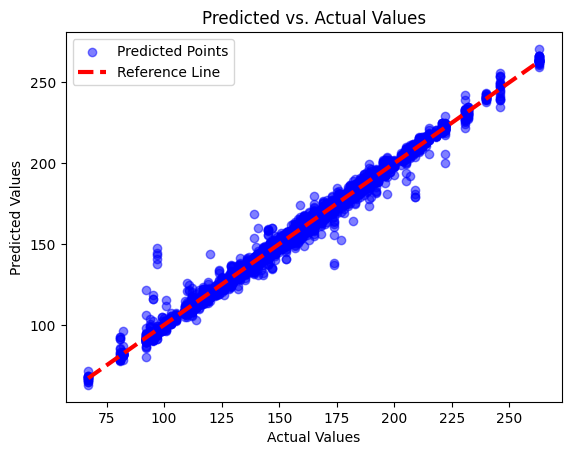

In [36]:
import matplotlib.pyplot as plt

# Scatter plot for predicted vs actual values
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predicted Points')

# Reference line with improved visibility
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=3, label='Reference Line')

# Adding labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.legend()

# Display the plot
plt.show()

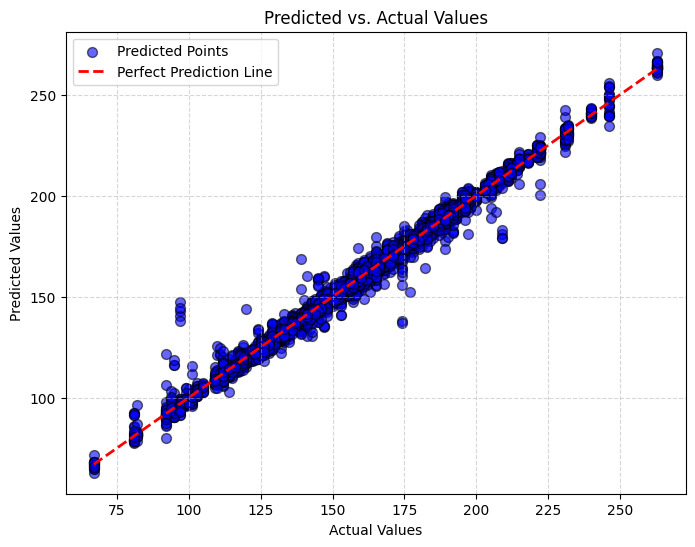

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Larger figure for better visibility
plt.scatter(y_test, predictions, alpha=0.6, c='blue', edgecolor='k', s=50, label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [39]:
#displaying and predicting the model
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler  # Import statements

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
bat_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowl_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
batsman = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

# Initialize encoders
venue_encoder = LabelEncoder()  # Encoder for venue (categorical)
bat_team_encoder = LabelEncoder()  # Encoder for batting_team (categorical)
bowl_team_encoder = LabelEncoder()  # Encoder for bowling_team (categorical)
batsman_encoder = LabelEncoder()  # Encoder for striker (categorical)
bowler_encoder = LabelEncoder()  # Encoder for bowler (categorical)


# Feature names (assuming you know the names of your features)
feature_names = ['mid','venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker','year','rolling_avg_runs','rolling_avg_wickets','cumulative_runs','cumulative_wickets','avg_runs_venue']

# Define dictionaries for missing features and their default values
missing_features = {
    'mid': df['mid'].mean() if df['mid'].dtype != object else df['mid'].mode()[0],
    'runs': df['runs'].mean() if df['runs'].dtype != object else df['runs'].mode()[0],
    'wickets': df['wickets'].mean() if df['wickets'].dtype != object else df['wickets'].mode()[0],
    'overs': df['overs'].mean() if df['overs'].dtype != object else df['overs'].mode()[0],
    'runs_last_5': df['runs_last_5'].mean() if df['runs_last_5'].dtype != object else df['runs_last_5'].mode()[0],
    'wickets_last_5': df['wickets_last_5'].mean() if df['wickets_last_5'].dtype != object else df['wickets_last_5'].mode()[0],
    'striker': df['striker'].mean() if df['striker'].dtype != object else df['striker'].mode()[0],
    'non-striker': df['non-striker'].mean() if df['non-striker'].dtype != object else df['non-striker'].mode()[0],
    'year': df['year'].mean() if df['year'].dtype != object else df['year'].mode()[0],
    'rolling_avg_runs': df['rolling_avg_runs'].mean() if df['rolling_avg_runs'].dtype != object else df['rolling_avg_runs'].mode()[0],
    'rolling_avg_wickets': df['rolling_avg_wickets'].mean() if df['rolling_avg_wickets'].dtype != object else df['rolling_avg_wickets'].mode()[0],
    'cumulative_runs': df['cumulative_runs'].mean() if df['cumulative_runs'].dtype != object else df['cumulative_runs'].mode()[0],
    'cumulative_wickets': df['cumulative_wickets'].mean() if df['cumulative_wickets'].dtype != object else df['cumulative_wicktes'].mode()[0],
    'avg_runs_venue': df['avg_runs_venue'].mean() if df['avg_runs_venue'].dtype != object else df['avg_runs_venue'].mode()[0]


    # ... Add other missing features and their defaults
}

# Fit encoders to your data (replace 'df' with your DataFrame)
venue_encoder.fit(df['venue'])
bat_team_encoder.fit(df['bat_team'])
bowl_team_encoder.fit(df['bowl_team'])
batsman_encoder.fit(df['batsman'])
bowler_encoder.fit(df['bowler'])

# Define the scaler object
scaler = MaxAbsScaler()
scaler.fit(X_train_transformed)  # Fit the scaler to the transformed training data


def predict_score(b):
    with output:
        clear_output()

        # Create a dictionary to store all features and their values
        all_features = {
            'venue': venue.value,
            'bat_team': bat_team.value,
            'bowl_team': bowl_team.value,
            'batsman': batsman.value,
            'bowler': bowler.value,
            **missing_features
        }

        # Extract values from the dictionary
        input_data = []
        for feature_name in feature_names:
            value = all_features.get(feature_name)
            if value is None:  # Handle missing features
                raise ValueError(f"Missing value for feature: {feature_name}")
            input_data.append(value)

       # Create a DataFrame from the input data
        input_data_df = pd.DataFrame(data=[input_data], columns=feature_names)

        # Ensure input data columns match training data columns
        input_data_columns = input_data_df.columns.tolist()
        X_train_columns = X_train.columns.tolist()
        if input_data_columns != X_train_columns:
            input_data_df = input_data_df[X_train_columns]

        # Transform and scale data
        input_transformed = preprocessor.transform(input_data_df)
        input_scaled = scaler.transform(input_transformed)

        predicted_score = model.predict(input_scaled)
        predicted_score = int(predicted_score[0, 0])

        print(predicted_score)

In [40]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, bat_team, bowl_team, batsman, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [41]:
import pandas as pd

# Assuming you have a DataFrame with 'actual' and 'predicted' columns
results_df = pd.DataFrame({'actual': y_test, 'predicted': predictions.flatten()})

results_df.to_csv('model_predictions.csv', index=False)

In [42]:
results_df.to_excel('model_predictions.xlsx', index=False)

In [43]:
results_df.head()

,actual,predicted
11670,129.0,126.371643
17516,246.0,240.406616
24766,148.0,150.703583
231,240.0,240.554718
20717,142.0,142.208191


KeyError: 0

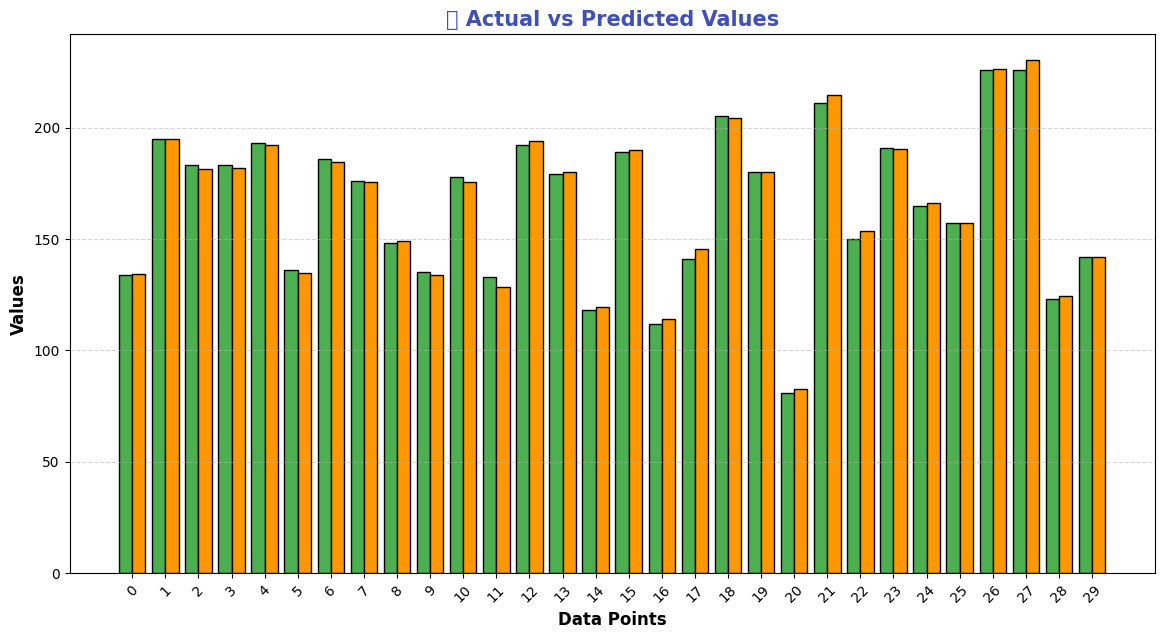

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sample size (limit number of data points for better visualization)
sample_size = 30

# Selecting a sample of values for clear visualization
y_test_sample = y_test[:sample_size]
predictions_sample = predictions[:sample_size]

# Bar chart setup
x = np.arange(len(y_test_sample))

plt.figure(figsize=(14, 7))  # Larger size for clarity

# Improved Colors and Design
plt.bar(x - 0.2, y_test_sample, width=0.4, label='Actual Values', color='#4CAF50', edgecolor='black')
plt.bar(x + 0.2, predictions_sample.flatten(), width=0.4, label='Predicted Values', color='#FF9800', edgecolor='black')

# Adding Labels and Title with Styling
plt.xlabel('Data Points', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('📊 Actual vs Predicted Values', fontsize=15, fontweight='bold', color='#3F51B5')

# Enhancing the X-axis
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding value markers for clarity
for i in range(sample_size):
    plt.text(i - 0.2, y_test_sample[i] + 1, f'{y_test_sample[i]:.1f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + 0.2, predictions_sample[i] + 1, f'{predictions_sample[i]:.1f}', ha='center', va='bottom', fontsize=9)

# Adding Legend
plt.legend(facecolor='white', framealpha=1, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


TypeError: unsupported format string passed to numpy.ndarray.__format__

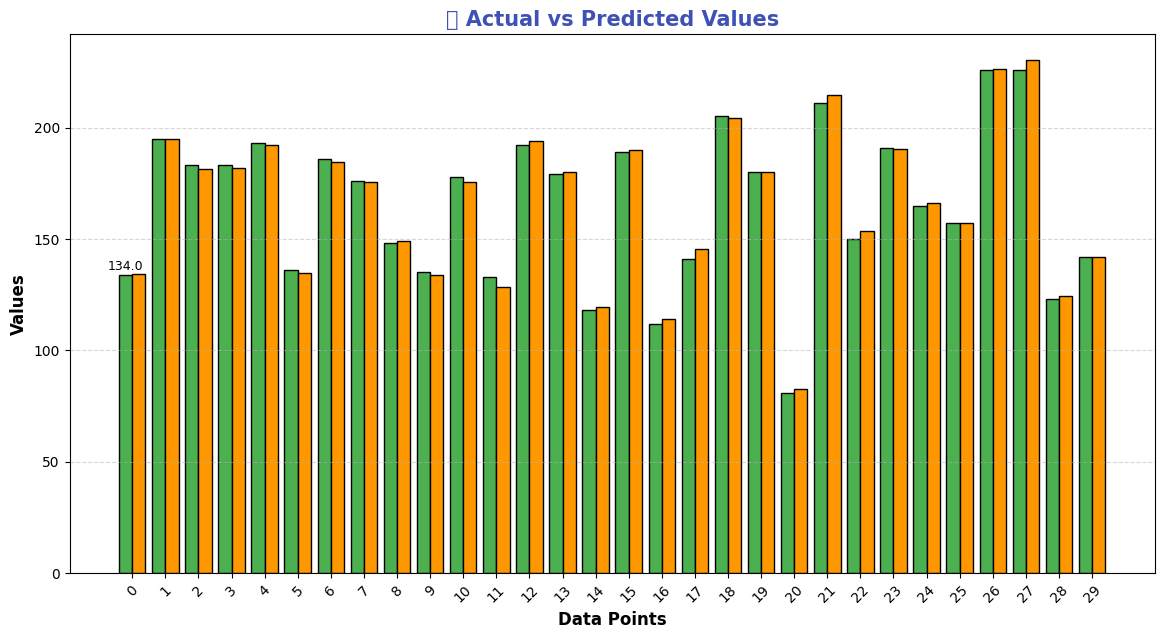

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Sample size (limit number of data points for better visualization)
sample_size = 30

# Selecting a sample of values for clear visualization
y_test_sample = y_test[:sample_size].reset_index(drop=True) # Reset index to 0, 1, 2...
predictions_sample = predictions[:sample_size]

# Bar chart setup
x = np.arange(len(y_test_sample))

plt.figure(figsize=(14, 7))  # Larger size for clarity

# Improved Colors and Design
plt.bar(x - 0.2, y_test_sample, width=0.4, label='Actual Values', color='#4CAF50', edgecolor='black')
plt.bar(x + 0.2, predictions_sample.flatten(), width=0.4, label='Predicted Values', color='#FF9800', edgecolor='black')

# Adding Labels and Title with Styling
plt.xlabel('Data Points', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('📊 Actual vs Predicted Values', fontsize=15, fontweight='bold', color='#3F51B5')

# Enhancing the X-axis
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding value markers for clarity
for i in range(sample_size):
    plt.text(i - 0.2, y_test_sample[i] + 1, f'{y_test_sample[i]:.1f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + 0.2, predictions_sample[i] + 1, f'{predictions_sample[i]:.1f}', ha='center', va='bottom', fontsize=9)

# Adding Legend
plt.legend(facecolor='white', framealpha=1, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

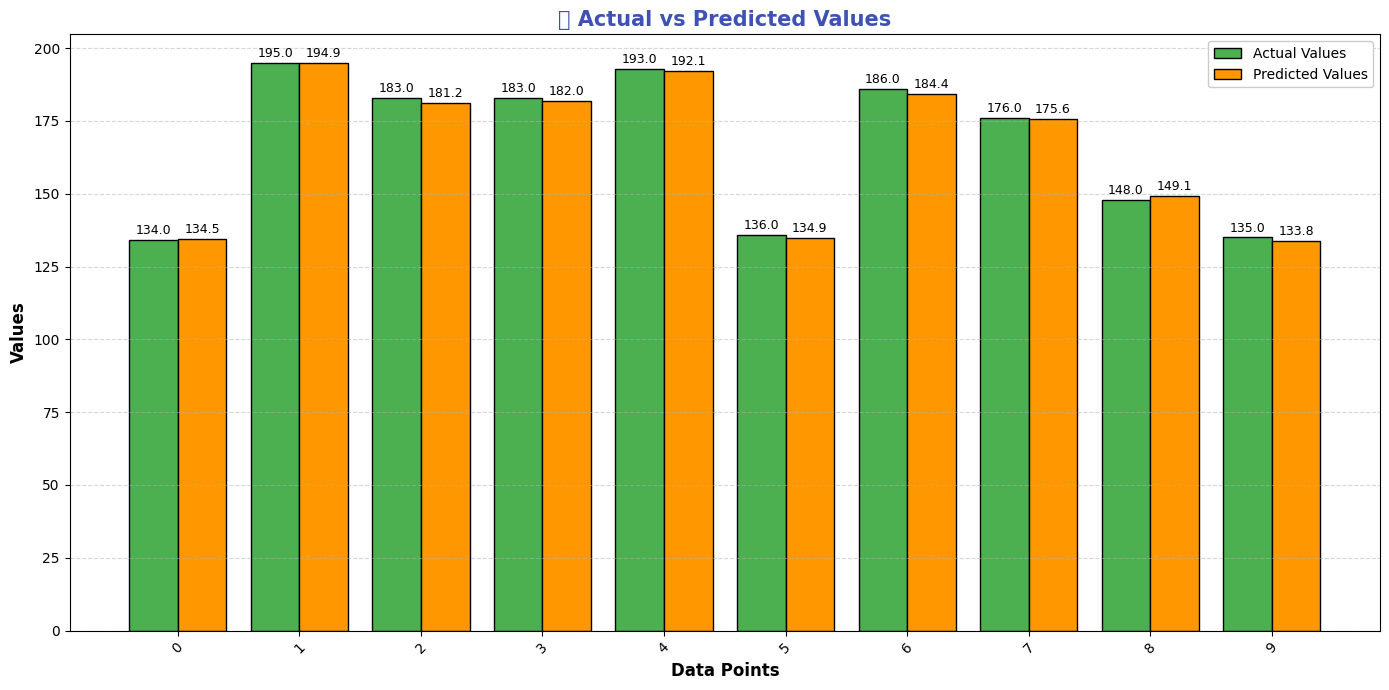

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample size (limit number of data points for better visualization)
sample_size = 10

# Selecting a sample of values for clear visualization
y_test_sample = y_test[:sample_size].reset_index(drop=True) # Reset index to 0, 1, 2...
predictions_sample = predictions[:sample_size]

# Bar chart setup
x = np.arange(len(y_test_sample))

plt.figure(figsize=(14, 7))  # Larger size for clarity

# Improved Colors and Design
plt.bar(x - 0.2, y_test_sample, width=0.4, label='Actual Values', color='#4CAF50', edgecolor='black')
plt.bar(x + 0.2, predictions_sample.flatten(), width=0.4, label='Predicted Values', color='#FF9800', edgecolor='black')

# Adding Labels and Title with Styling
plt.xlabel('Data Points', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('📊 Actual vs Predicted Values', fontsize=15, fontweight='bold', color='#3F51B5')

# Enhancing the X-axis
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding value markers for clarity
for i in range(sample_size):
    plt.text(i - 0.2, y_test_sample[i] + 1, f'{y_test_sample[i]:.1f}', ha='center', va='bottom', fontsize=9)
    # Accessing the numerical value from the NumPy array using item() or [0]
    plt.text(i + 0.2, predictions_sample[i][0] + 1, f'{predictions_sample[i][0]:.1f}', ha='center', va='bottom', fontsize=9)

# Adding Legend
plt.legend(facecolor='white', framealpha=1, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()